In [3]:
from omegaconf import OmegaConf
import hydra
from src.models.patch_tumor_pred_diffusion_module_simpl import PatchTumorDiffusionLitModule
from src.models.brats_module import BraTSLitModule


In [5]:
import yaml
from src.datasets.brats_datamodule import BraTSDataModule as BraTSDataModule1
from matplotlib import pyplot as plt
from src.datasets.patch_tumor_classify_diffusion_datamodule import BraTSDataModule


In [6]:
ckpt = '/home/sanyal/Projects/BraTS3DDiff/logs/bratseg_logs/bratseg_baselines/BraTS23-nnUNET_baseline_0/train/runs/2024-08-08_13-23-09/csv/version_0/checkpoints/epoch=82-step=10292.ckpt'
model = BraTSLitModule.load_from_checkpoint(ckpt)

In [5]:
with open('/home/sanyal/Projects/BraTS3DDiff/configs/data/brats23.yaml') as f:
    cfg = yaml.safe_load(f)
cfg.pop('_target_')
cfg['data_dir'] = '/home/sanyal/Projects/BraTS3DDiff/data/BraTS-Data/BraTS2023-GLI'
cfg['batch_size'] = 1
a = BraTSDataModule(**cfg)

test_data = a.data_test
val_data = a.data_val

data = val_data.__getitem__(5)

In [6]:
image, mask, fg = data['image'], data['mask'], data['foreground']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[0,:,:,78],cmap='gray')
axes[2].imshow(mask[1,:,:,78],cmap='gray')
axes[3].imshow(mask[2,:,:,78],cmap='gray')

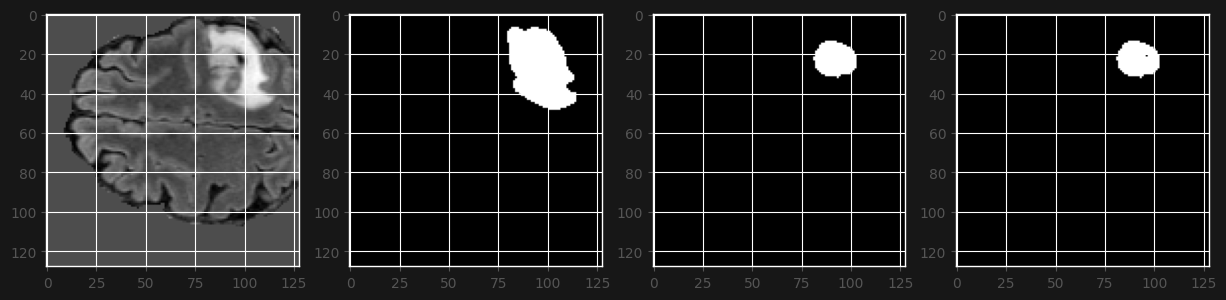

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[0,:,:,78],cmap='gray')
axes[2].imshow(mask[1,:,:,78],cmap='gray')
axes[3].imshow(mask[2,:,:,78],cmap='gray')

In [8]:
image = image.cuda()
model = model.cuda()
fg = fg.cuda()

NameError: name 'model' is not defined

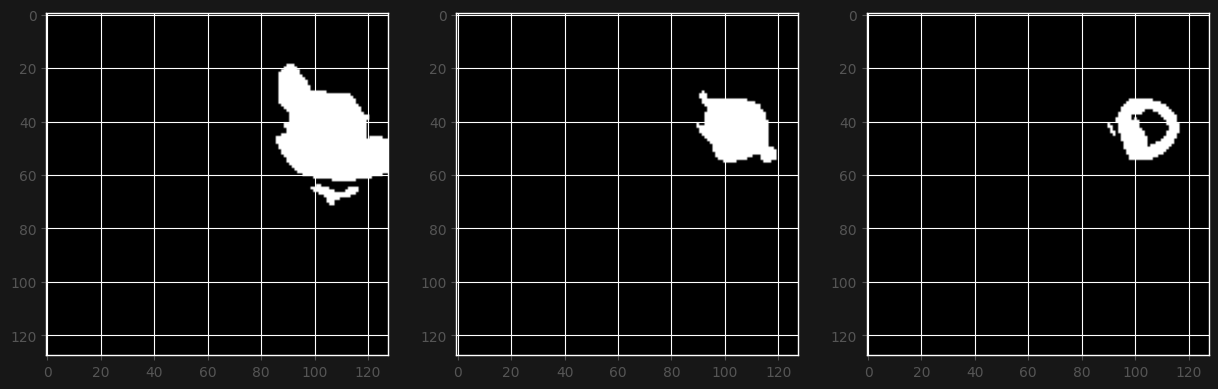

In [51]:
pred_mask = model.forward(image.unsqueeze(0)) * fg 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
pred_mask = pred_mask.sigmoid().gt(0.5).detach().cpu()
axes[0].imshow(pred_mask[0,0,:,:,78],cmap='gray')
axes[1].imshow(pred_mask[0,1,:,:,78],cmap='gray')
axes[2].imshow(pred_mask[0,2,:,:,78],cmap='gray')

In [9]:
ckpt = '/home/sanyal/Projects/BraTS3DDiff/logs/bratseg_logs/patch_diffusion/BraTS23-SwinUnetR-512-patch_tumor_classify_diffusion_roi_128_lr=0.001/train/runs/2024-09-27_18-27-30/csv/version_0/checkpoints/epoch=230-step=114576.ckpt'
model = PatchTumorDiffusionLitModule.load_from_checkpoint(ckpt)

model_cfg_path = '/home/sanyal/Projects/BraTS3DDiff/configs/model/patch_tumor_classify_diffusion.yaml'
model_cfg = OmegaConf.load(model_cfg_path)
model_cfg.scheduler.max_epochs = 5
model_cfg.net.in_channels = 7
model_cfg.net.out_channels = 3
model_cfg.sampler.diffusion_steps = 1000
model_cfg.inferer.roi_size = [128,128,128]
model_cfg.extra_kwargs.roi_size = [128,128,128]
model_cfg.extra_kwargs.patch_sizes = [16, 32]
model_cfg.embed_net.img_size = [128,128,128]
model_cfg.extra_kwargs.num_targets = 3
model_cfg.extra_kwargs.patch_thresh = 0.50
model = hydra.utils.instantiate(model_cfg)
extra_kwargs = model.hparams.extra_kwargs

ckpt = '/home/sanyal/Projects/BraTS3DDiff/logs/bratseg_logs/patch_diffusion/BraTS23-SwinUnetR-512-patch_tumor_classify_diffusion_roi_128_lr=0.001/train/runs/2024-09-27_18-27-30/csv/version_0/checkpoints/epoch=230-step=114576.ckpt'
pd_model_1 = PatchTumorDiffusionLitModule.load_from_checkpoint(ckpt)
model.hparams.extra_kwargs = extra_kwargs

BasicUNet features: (64, 64, 128, 256, 512, 64).


In [11]:
with open('/home/sanyal/Projects/BraTS3DDiff/configs/data/brats23_patch_tumor_classify_diffusion.yaml') as f:
    cfg = yaml.safe_load(f)
cfg.pop('_target_')
cfg['data_dir'] = '/home/sanyal/Projects/BraTS3DDiff/data/BraTS-Data/BraTS2023-GLI'
cfg['batch_size'] = 1
a = BraTSDataModule(**cfg)

test_data = a.data_test
val_data = a.data_val

data = val_data.__getitem__(99)

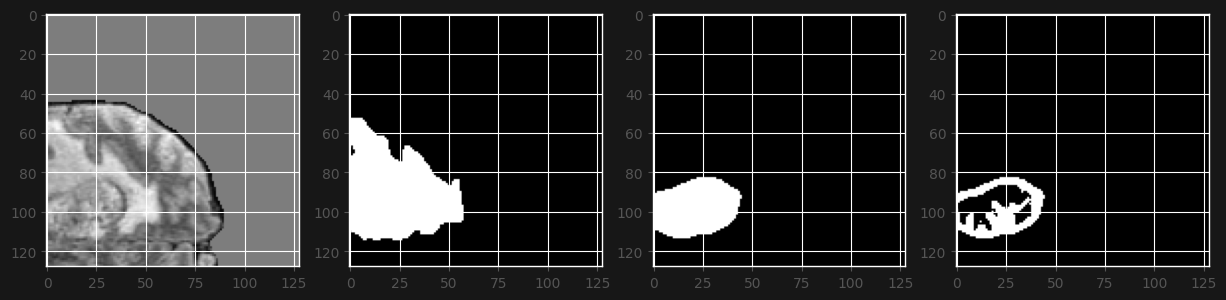

In [12]:
image, mask, fg = data['image'], data['mask'], data['foreground']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[0,:,:,78],cmap='gray')
axes[2].imshow(mask[1,:,:,78],cmap='gray')
axes[3].imshow(mask[2,:,:,78],cmap='gray')

In [16]:
image.shape

torch.Size([4, 128, 128, 128])

In [13]:
model = model.to('cuda')
image = image.to('cuda')
image = image.unsqueeze(0)

In [18]:
fg = fg.to('cuda')
fg = fg.unsqueeze()

TypeError: unsqueeze() missing 1 required positional arguments: "dim"

In [19]:
image.shape

torch.Size([1, 4, 128, 128, 128])

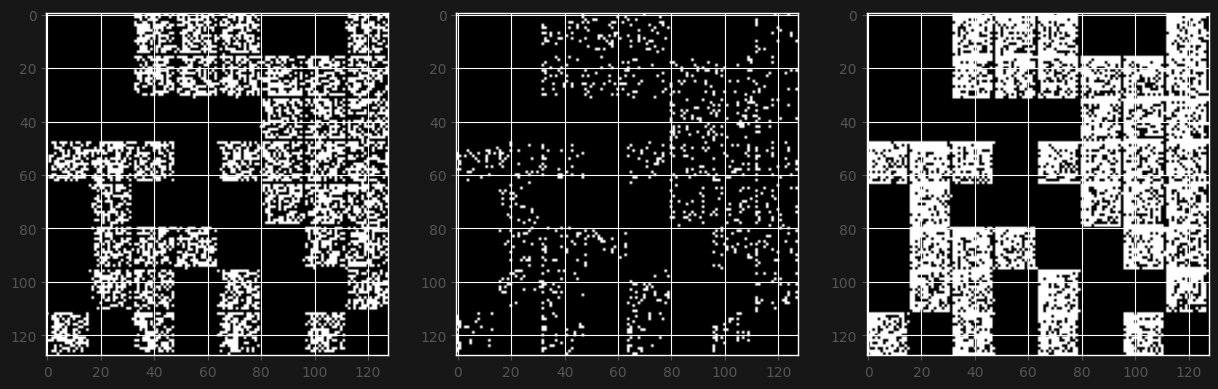

In [14]:
pred_mask = model.predict_seg_mask(image)['res=16']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
pred_mask = pred_mask.sigmoid().gt(0.5).detach().cpu()
axes[0].imshow(pred_mask[0,0,:,:,78],cmap='gray')
axes[1].imshow(pred_mask[0,1,:,:,76],cmap='gray')
axes[2].imshow(pred_mask[0,2,:,:,78],cmap='gray')